# Trace + Network Detection for Image File

100%|██████████| 2/2 [01:58<00:00, 59.10s/it]


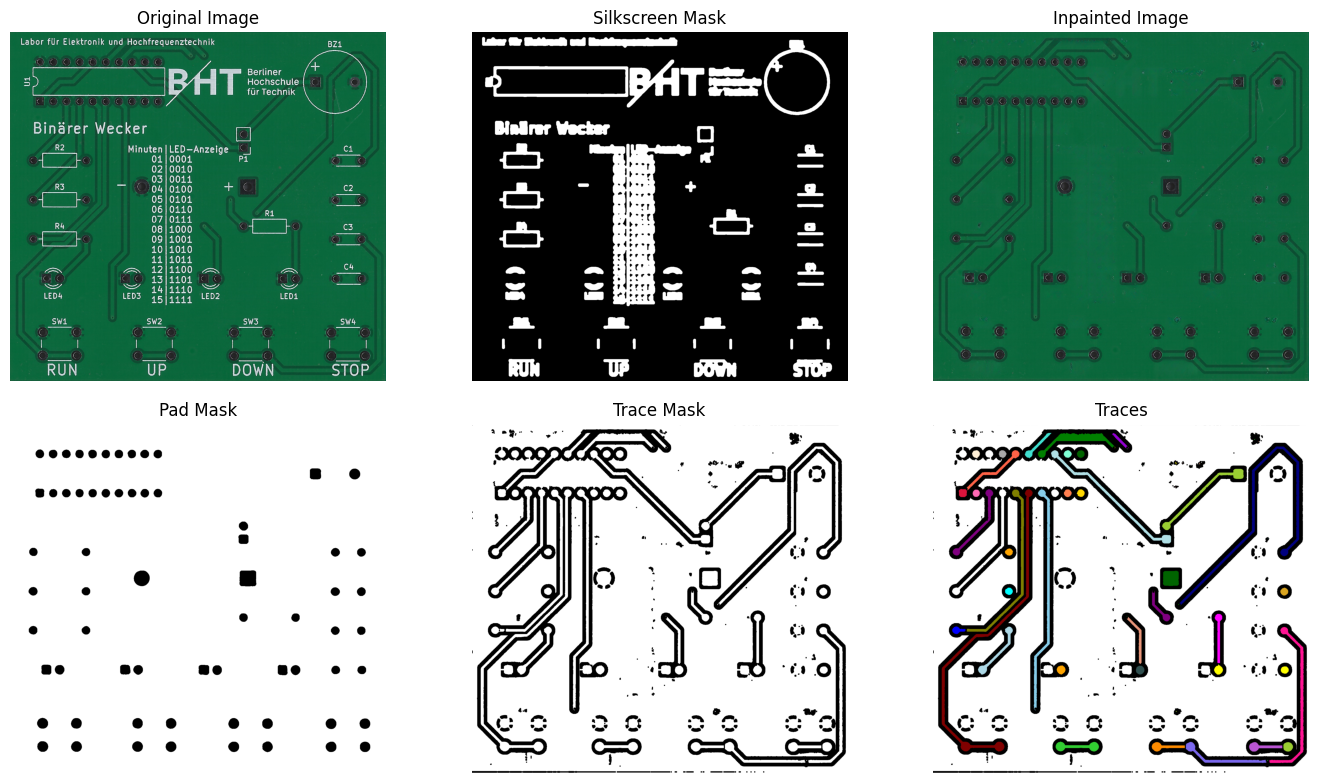

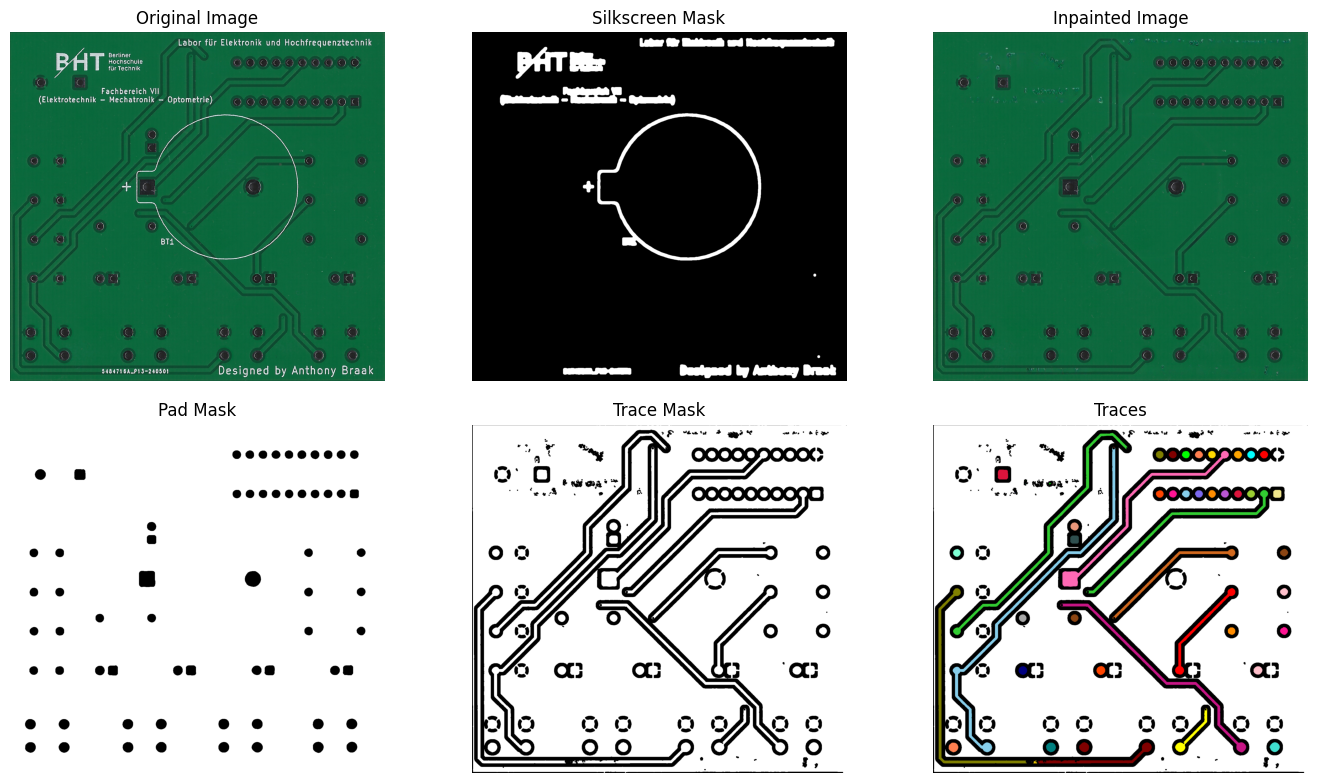

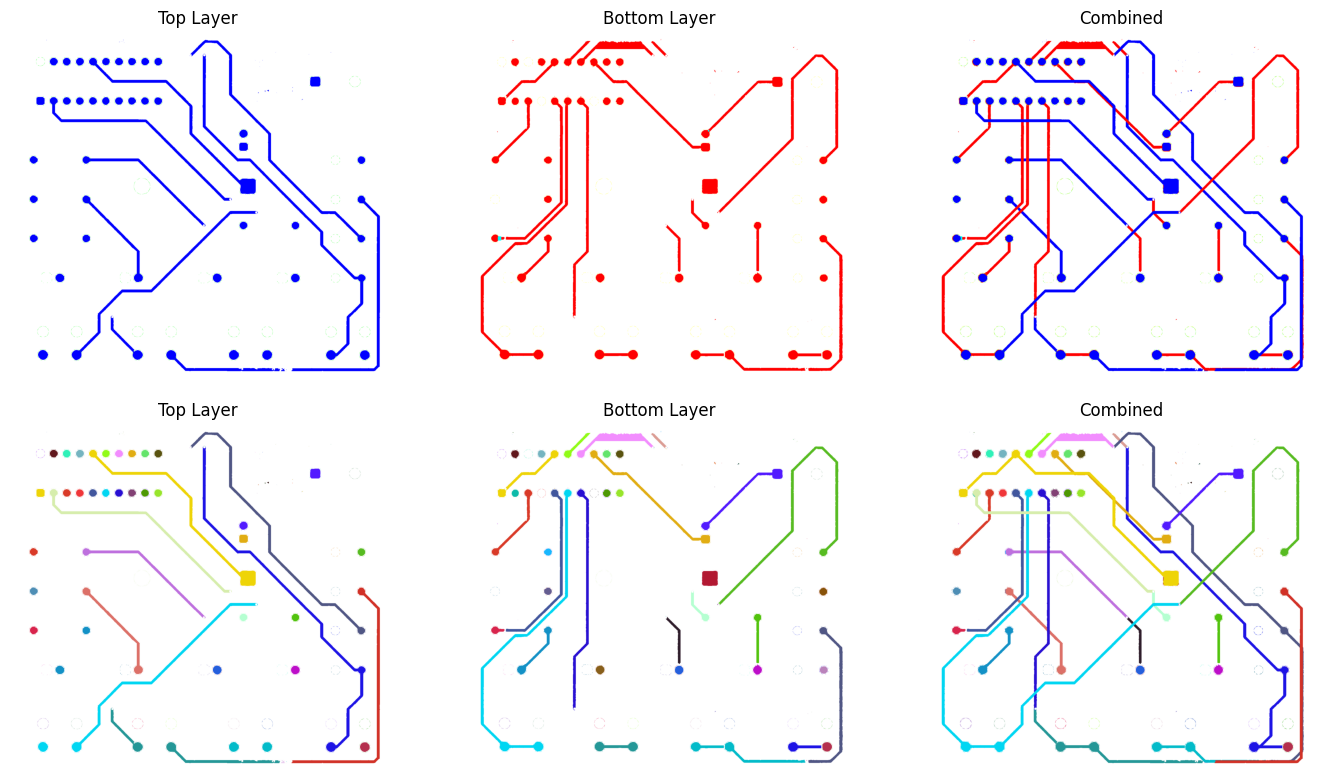

In [1]:
from trace_detection import TraceDetection
import cv2

# Load images for each layer
top_layer = cv2.imread('test_images/0001_bin_alarm/base_top.png')

bottom_layer = cv2.imread('test_images/0001_bin_alarm/base_bottom.png')

layer_images = [top_layer, bottom_layer]

# Create masks for each layer
td = TraceDetection()
masks = td.create_masks(layer_images)
td.show(layer_images, masks)

# Create net list
net_list = td.create_net_list(masks, mirror=[False, True])
td.show(layer_images, None, net_list)


# Trace + Network Detection for Image Folder

Loaded top and bottom layers for 0001_bin_alarm


100%|██████████| 2/2 [02:01<00:00, 60.66s/it]


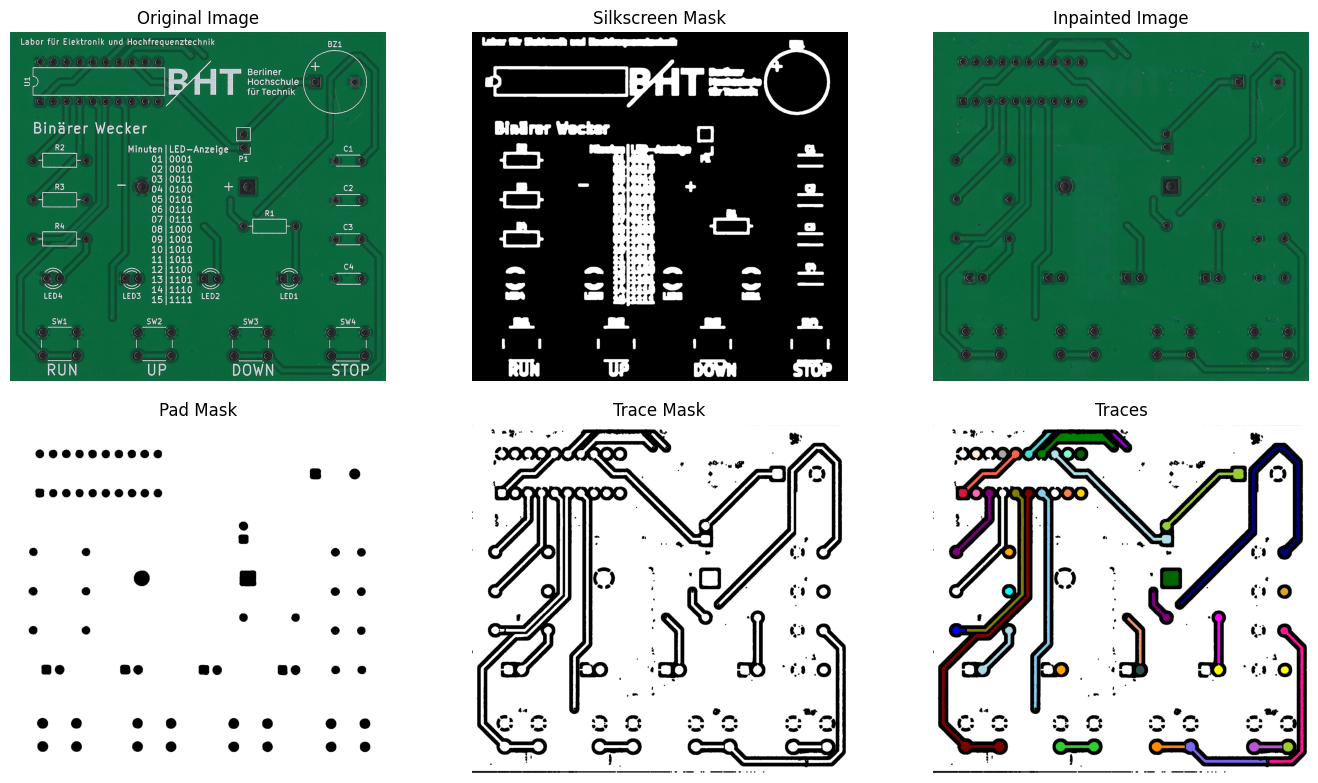

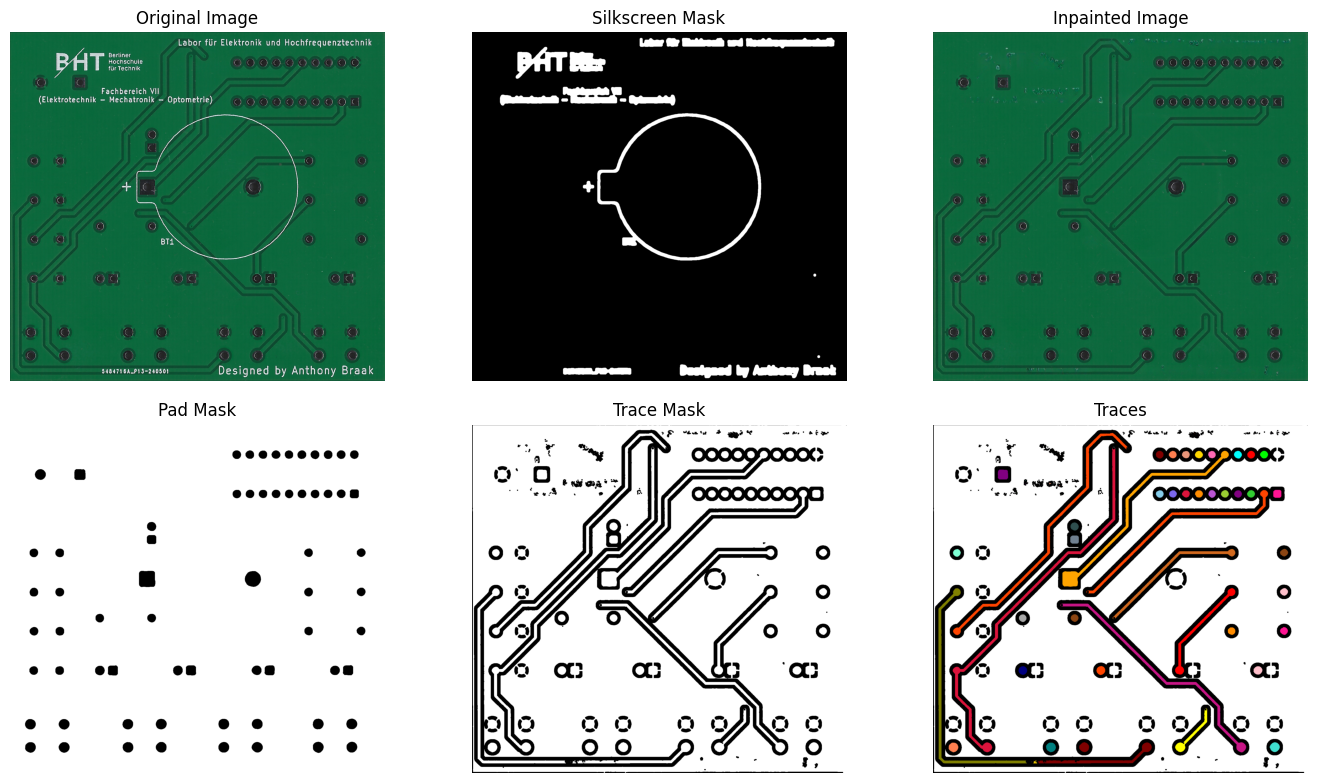

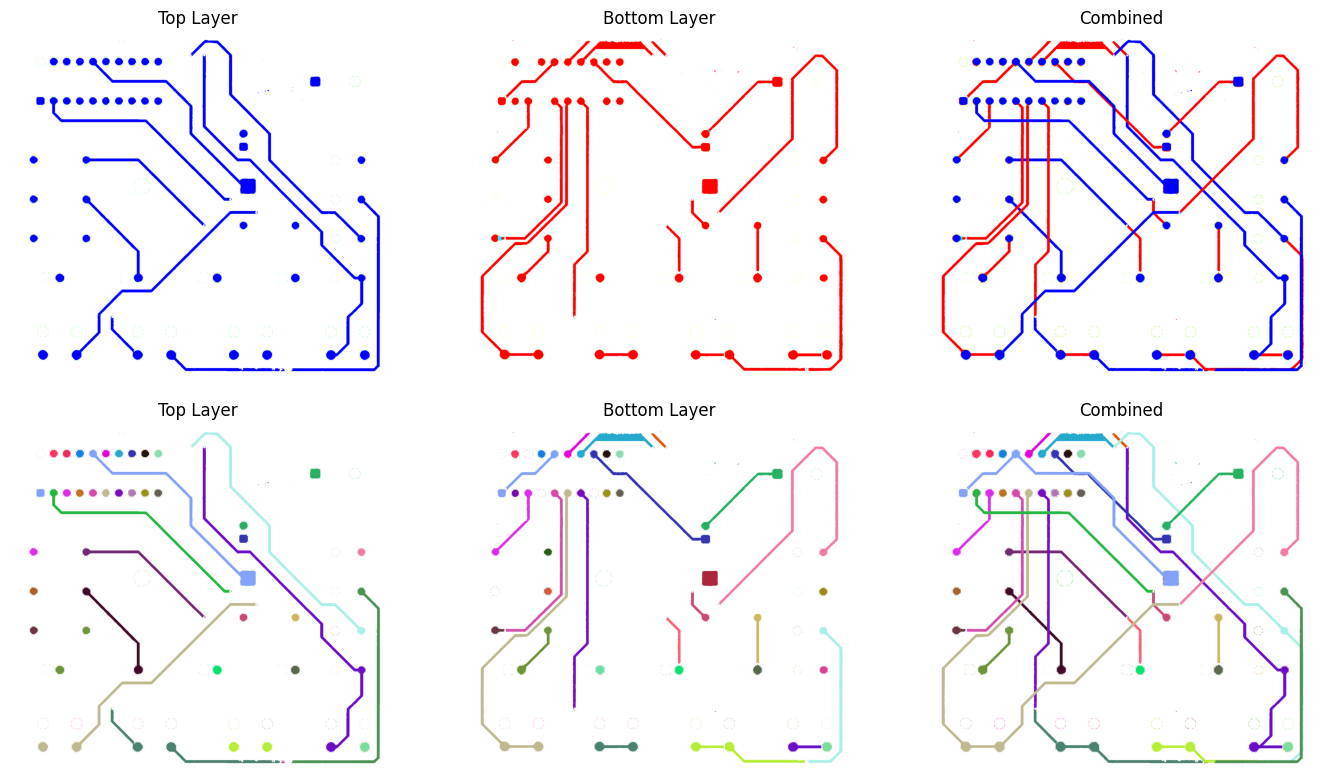

Number of nets for 0001_bin_alarm: 133
Loaded top and bottom layers for 0003_simon_says


100%|██████████| 2/2 [03:51<00:00, 115.86s/it]


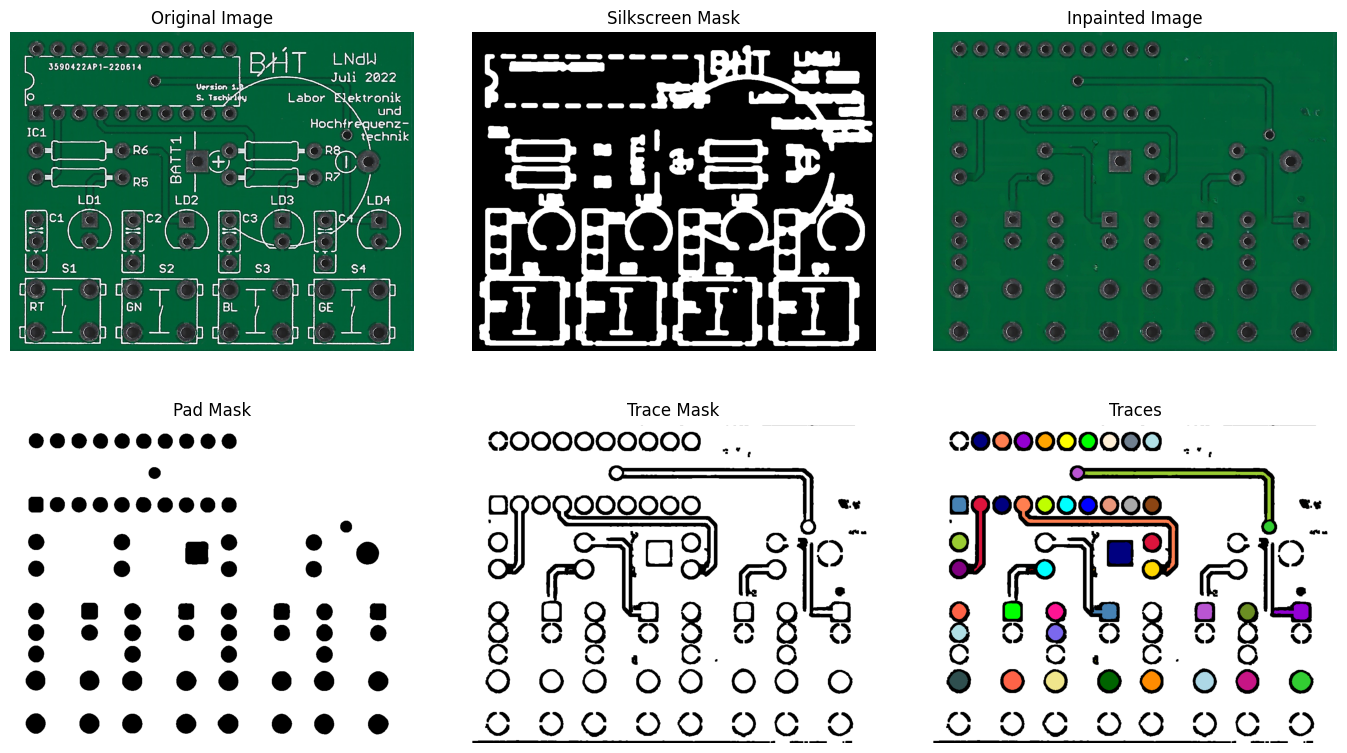

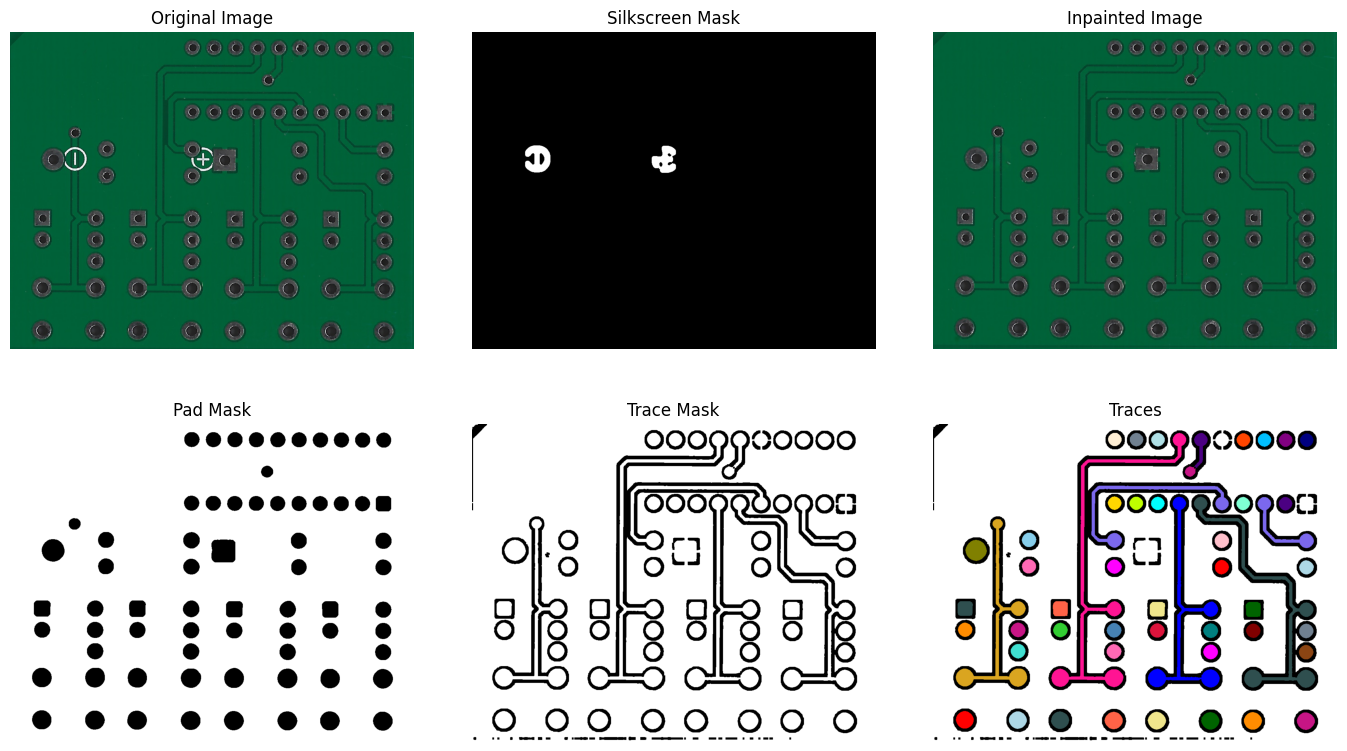

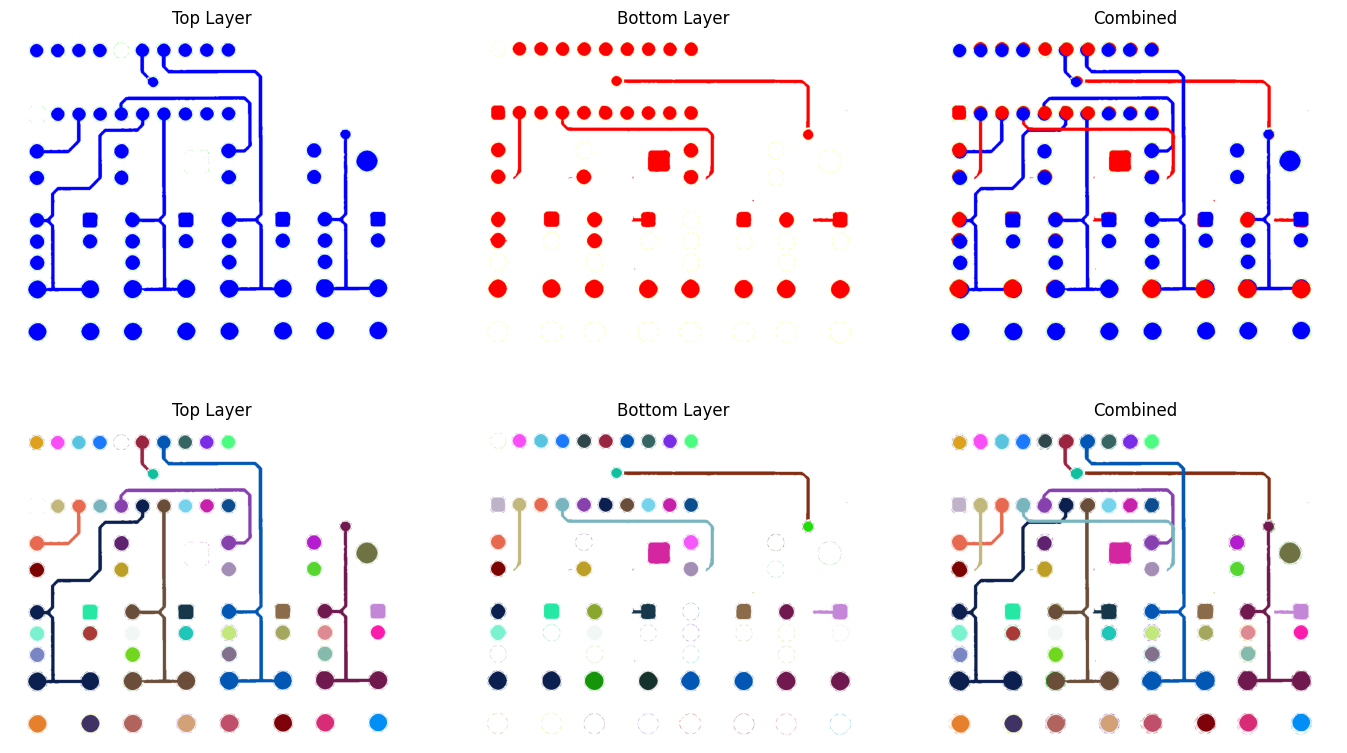

Number of nets for 0003_simon_says: 84
Image Processing finished!


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from trace_detection import TraceDetection

td = TraceDetection()
base_dir = 'test_images'

# Loop over all base directories
for dir_name in os.listdir(base_dir):
    dir_path = os.path.join(base_dir, dir_name)
    
    # Check if it is a directory
    if os.path.isdir(dir_path):
        # Paths to bottom and top layers
        top_layer_path = os.path.join(dir_path, 'base_top.png')
        bottom_layer_path = os.path.join(dir_path, 'base_bottom.png')
        
        # Check if files exist
        if os.path.exists(top_layer_path) and os.path.exists(bottom_layer_path):
            # Load Images
            top_layer = cv2.imread(top_layer_path)
            bottom_layer = cv2.imread(bottom_layer_path)
            print(f"Loaded top and bottom layers for {dir_name}")
            
            # Create masks for each layer
            layer_images = [top_layer, bottom_layer]
            masks = td.create_masks(layer_images)
            td.show(layer_images, masks, save = True, path = f'masks/{dir_name}_')

            # Create netlist
            net_list = td.create_net_list(masks, mirror=[False, True])
            td.show(layer_images, None, net_list, save = True, path = f'netlists/{dir_name}_')

            # Print netlist
            print(f'Number of nets for {dir_name}: {len(net_list)}')

        else:
            print(f"Missing top or bottom layer in {dir_name}")

print("Image Processing finished!")
